### Something is wrong!
### Something is wrong?
### Something is wrong!

# Massandopolis - the quest for 'wrong'

My attempts to find what - if anything - is wrong with healthcare in Massandopolis, I focussed most of my energies on understanding the people of Massandopolis.

## Basic data quality assessment: 

Fairly complete. A few nulls here and there. One person who dies in the future. One annoying table join (see section on drugs below).

## Data analysis:

Since the question was phrased as "IS" wrong, I tried to focus on the last 20-30 years of data, even more recent in places. 


### Life and Death Stats

First, I checked out basic demographics. Ages, ages at death, base mortality rates, etc. It's clear mortality has been rising steadily, and the population is shrinking - there's no wonder the Massandopolans are worried.

At first I thought the increase in mortality rates could be just a function of an aging population, and certainly there's a bit of that there. 

There has been a big die-off of folks (especially men) born between 1929-1935, even since 2010, though the cause of death data isn't that suspicious. They do seem to have a fair big of lung troubles. A lot of natural causes, pneumonia and such. And they're the right ages to have worked in the famed Massandopolis coal mines) and likely smoke.

There's a hint of too-much-dying in the hispanic population, but I'd need more time/data to be sure.

My biggest worry about the deaths in Massandopolis are their causes. Drug overdose - even among the seniors - is a huge problem. 5% of senior deaths due to overdose? 50% of young-adult deaths? That's huge. 

### Drug problems

According to my ('codone') checks, 60% of all living Massandopoleans in the system have had a drug overdose. 45% have at least prescription for a drug with "codone" in the name - my lazy way of finding opioids (since the concept table had no obvious join). 

2268 living folk have had opioid prescriptions. Since 1990, Docs have written 8111 scripts for 'codone's. The medication - encounter - join I tried led to the "PROVIDER" column being the organization - not the actual prescribing doctor. So I couldn't nail down any individual over-prescribers. That information (prescribing doc) would have been very handy.

The hospitals where prescriptions are coming from I can't say are suspicious or not. However, the overabundance of encounters and condition-entries for "chronic pain" and "migraines" makes me wonder if we don't have some people blatantly drug-seeking and successfully.

Other common encounter reason-types - pregnancy, hyperlipidemia, CHF, viral sinusitis (cold), seem normal enough. 

I didn't see any obvious problems with drug costing, but would like to look more closely.

### Out of control diabetes

I had trouble finding diabetes encounters, and only 100 patients had medication entries for insulin. That would mean up to half the diabetics aren't getting insulin? Given the BMI distribution (30% obese or more) I would have expected more diabetes and more insulin. These patients may be being underserved, or refusing treatment. Either way, it doesn't look good.

## Out of time

I ran out of time for digging far into procedures, immunizations, imaging (lots of thoracic stuff - coal mines?) and care plans. I also didn't use the 'concepts' table to join anywhere because the other tables had "CODE" columns but not a code type - leaving it open to collisions. If it were me, I'd want code type specified in any table that uses "CODE".



## Stream of consciousness evidence gathering follows









### Ok. Before I can figure out what is wrong I need to get an idea for what IS.
Let's take a look at the data files. 
No, wait. Let's think about it for a minute, first.

Things that could be wrong:
    a) The data is wrong
        approach: Do sanity checks on the individual tables wrt data completeness and 'correctness'.
    b) The data shows me something is wrong with the people.
        approach: Do sanity checks on the patient-centric tables wrt my biased expectations of usage and illness rates
    c) The data shows me something is being done wrong For the people
        approach: Look at costs, rxes, procedures, encounter rates, and - if they're there - deaths
    d) All of the above
        approach: Whatever random stuff I do as digressions
    


In [124]:
## First things first:  some imports
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import sklearn
import glob

In [9]:
# A quick tour of ALL the tables
fnames = glob.glob("*.csv")
fnames

['medications.csv',
 'providers.csv',
 'imaging_studies.csv',
 'allergies.csv',
 'procedures.csv',
 'organizations.csv',
 'conditions.csv',
 'careplans.csv',
 'encounters.csv',
 'immunizations.csv',
 'patients.csv',
 'concepts.csv',
 'observations.csv']

In [29]:
# We all know this is the central table
pats = pd.read_csv("patients.csv")
n_patients = len(set(pats['Id'].values))
print(n_patients)

# Hm. Are there dupes?
print(len(pats)) 
# No! Good job, recordkeepers.



8360
8360


In [134]:
## What about dead folks?
deaths = pats['DEATHDATE'].count()
deaths

3360

In [ ]:
## SO we have a round 5000 folks. CONVENIENT.

In [243]:
## OK. Super naive data exploration time.
## How big are the tables
## how far back does data go
## how many (on super average) are there of *thing* per patient

patient_linked=[]
independent=[]
for fname in fnames:
    root= fname.split(".")[0]
    df = pd.read_csv(fname)
    print("There are ---> {} rows in the ---> {} table.".format(len(df), root.upper()))
    print("That's {} per patient".format(len(df)/n_patients))
    if len(df)<1000000:
        for date_word in ['START','STOP','DATE','BIRTHDATE','DEATHDATE']:
            if date_word in df.columns:
                df[date_word]=df[date_word].apply(pd.to_datetime)

                print("earliest {}: {}, latest date: {}".format(date_word, min(df[date_word]), max(df[date_word])))

    print("How about nulls? -->")
    for column in df:
        if df[column].isnull().any():
            print('{0} has {1} null values'.format(column, df[column].isnull().sum())) 
    if 'PATIENT' in df.columns:
        patient_linked.append(root)
    else:
        independent.append(root)
    print()
    
print("TABLES JOINABLE TO PATIENT TABLE: {}".format(patient_linked))
print("DIM TABLES: {}".format(independent))

There are ---> 124759 rows in the ---> MEDICATIONS table.
That's 14.923325358851674 per patient
earliest START: 1909-11-26 00:00:00, latest date: 2019-05-06 00:00:00
earliest STOP: 1909-12-10 00:00:00, latest date: 2019-05-06 00:00:00
How about nulls? -->
STOP has 16524 null values
REASONCODE has 44940 null values
REASONDESCRIPTION has 44940 null values

There are ---> 125 rows in the ---> PROVIDERS table.
That's 0.014952153110047847 per patient
How about nulls? -->

There are ---> 8278 rows in the ---> IMAGING_STUDIES table.
That's 0.9901913875598086 per patient
earliest DATE: 1912-08-28 00:00:00, latest date: 2019-05-01 00:00:00
How about nulls? -->

There are ---> 3262 rows in the ---> ALLERGIES table.
That's 0.3901913875598086 per patient
earliest START: 1909-08-21 00:00:00, latest date: 2019-04-14 00:00:00
earliest STOP: NaT, latest date: NaT
How about nulls? -->
STOP has 2705 null values

There are ---> 419399 rows in the ---> PROCEDURES table.
That's 50.16734449760766 per patien

So I am super impressed with record keeping in Massandopolis, as it appears we have medical record information going back as far as 1908. 

I personally don't trust any information over 30, so we might have to ignore some of the old stuff later on.



... I think it's time to get to know the people of Massandopolis.

In [1034]:
#pats.head()

In [562]:
## Let's make these dates a little more usable, shall we?

pats['BIRTHDATE']=pats['BIRTHDATE'].apply(pd.to_datetime)
pats['BIRTHYEAR']=pats['BIRTHDATE'].dt.year
pats['BIRTHDAY']=pats['BIRTHDATE'].dt.day
pats['BIRTHMONTH']=pats['BIRTHDATE'].dt.month
pats['DEATHDATE']=pats['DEATHDATE'].apply(pd.to_datetime)
pats['DEATHYEAR']=pats['DEATHDATE'].dt.year
pats['APPROX_AGE_AT_DEATH']=(pats['DEATHDATE'].dt.year-pats['BIRTHDATE'].dt.year)


### SEPARATING THE LIVING FROM THE DEAD

In investigating the people of Massandopolis, I'm interested in what's going on with the living as well as with the (recently) dead. The living might be sick, the dead might have died unjustly. Both are interesting!
For ease of understanding I'm keeping them separate here.

In [618]:
alive = pats[pats['DEATHYEAR'].fillna(2050)> 2019]
alive.name = 'alive'
dead = pats[pats['DEATHYEAR'].fillna(2050)<=2019]
dead.name = 'dead'

## NOTE: Someone had a magical future deathdate of 2022, so just using a null Deathdate was a bad idea.
## Thus my odd fillna solution.
## Someone should really check on Mr Eddy Dach!

In [621]:
## OVERALL MORTALITY

dead_years = sorted(dead['DEATHYEAR'].unique())
#print(dead_years)

##Spotty records before 1930. 

## RATES AND CAUSES OF DEATH

In [1035]:
## Simple mortality estimates

morts =[]
popns=[]
deaths=[]
avg_age_of_death=[]
start_year = 1912
#FOR SAKE OF THIS PLOT, I'M LAZILY FILLING DEATHYEAR WITH 2040
# eg. pats['DEATHYEAR'].fillna(2040)
for year in range(start_year,2020):
    #print(year)
    starting_popn = pats[pats['BIRTHYEAR']<=year][pats['DEATHYEAR'].fillna(2050)>year]['Id'].nunique()
    dead_this_year = dead[dead['DEATHYEAR']==year]['Id'].nunique()
    mortality_rate = dead_this_year/starting_popn*1000
    avg_age_of_death.append(dead[dead['DEATHYEAR']==year]['APPROX_AGE_AT_DEATH'].mean())
    deaths.append(dead_this_year)
    popns.append(starting_popn)
    morts.append(mortality_rate)
    


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


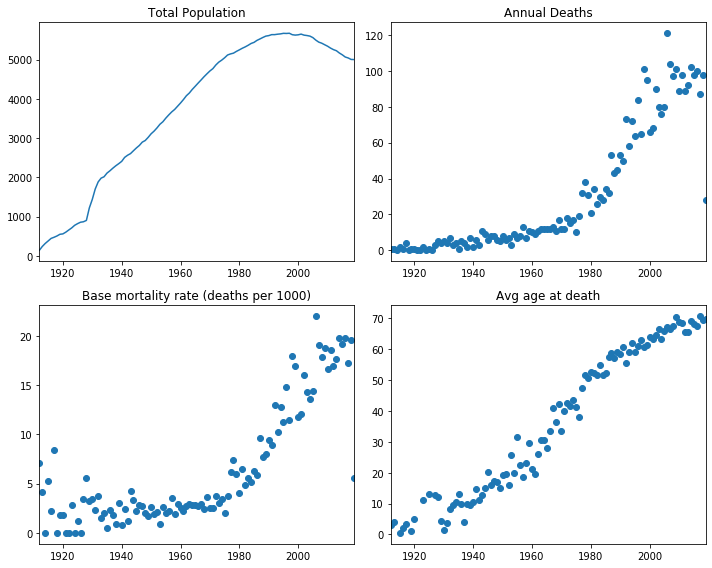

In [1036]:
# Matplotlib. It's gross but it works.

f, (ax) = plt.subplots(2,2, sharey=False, figsize=(10, 8))
ax[0,0].plot(range(start_year, 2020), popns)
ax[0,0].set_title('Total Population')
ax[0,0].set_xlim([start_year,2019])
ax[0,1].scatter(range(start_year,2020), deaths)
ax[0,1].set_title("Annual Deaths")
ax[0,1].set_xlim([start_year,2019])
ax[1,0].scatter(range(start_year,2020), morts)
ax[1,0].set_title("Base mortality rate (deaths per 1000)")
ax[1,0].set_xlim([start_year,2019])
ax[1,1].scatter(range(start_year,2020), avg_age_of_death)
ax[1,1].set_title("Avg age at death")
ax[1,1].set_xlim([start_year,2019])
plt.tight_layout()


## So, like I said before. Recordkeeping in the old days was rubbish, plus average age at death is kind of meaningless when there's less than 10 deaths a year!

## Let's try looking at the last 30 years, or say, since 1990

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


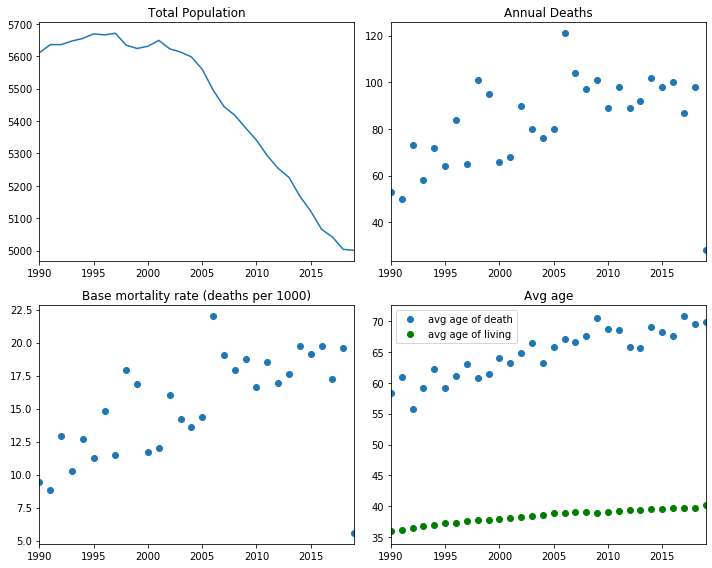

In [695]:
morts =[]
popns=[]
deaths=[]
avg_age_of_death=[]
avg_age_of_alive=[]
start_year = 1990
#FOR SAKE OF THIS PLOT, I'M LAZILY FILLING DEATHYEAR WITH 2040
pats['DEATHYEAR'].fillna(2040)
for year in range(start_year,2020):
    #print(year)
    starting_popn = pats[pats['BIRTHYEAR']<=year][pats['DEATHYEAR'].fillna(2050)>year]['Id'].nunique()
    dead_this_year = dead[dead['DEATHYEAR']==year]['Id'].nunique()
    mortality_rate = dead_this_year/starting_popn*1000
    avg_age_of_death.append(dead[dead['DEATHYEAR']==year]['APPROX_AGE_AT_DEATH'].mean())
    avg_age_of_alive.append(pats[pats['BIRTHYEAR']<=year][pats['DEATHYEAR'].fillna(2050)>year]['BIRTHYEAR'].apply(lambda x: year - x).mean())
    deaths.append(dead_this_year)
    popns.append(starting_popn)
    morts.append(mortality_rate)
    

f, (ax) = plt.subplots(2,2, sharey=False, figsize=(10, 8))
ax[0,0].plot(range(start_year, 2020), popns)
ax[0,0].set_title('Total Population')
ax[0,0].set_xlim([start_year,2019])
ax[0,1].scatter(range(start_year,2020), deaths)
ax[0,1].set_title("Annual Deaths")
ax[0,1].set_xlim([start_year,2019])
ax[1,0].scatter(range(start_year,2020), morts)
ax[1,0].set_title("Base mortality rate (deaths per 1000)")
ax[1,0].set_xlim([start_year,2019])
ax[1,1].scatter(range(start_year,2020), avg_age_of_death, label = 'avg age of death')
ax[1,1].scatter(range(start_year, 2020), avg_age_of_alive, color='g', label = 'avg age of living')
ax[1,1].set_title("Avg age")
ax[1,1].set_xlim([start_year,2019])
plt.tight_layout()
plt.legend()


### So that's....not good. Annual deaths and base mortality rate are all going up...but so is average age at death.
### Better look more closely at age-distributions of death

In [676]:
dead['AGE_BIN_AT_DEATH'] = pd.cut(dead['APPROX_AGE_AT_DEATH'], bins=[0,12,20,40,65,90,120], include_lowest=True, labels = ['kids','teens','adults','middle_age','senior','elder'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#90s distribution
nineties_dead = dead[dead['DEATHYEAR']>1990][dead['DEATHYEAR']<2001]
dead_dict={}
for agebin in dead['AGE_BIN_AT_DEATH'].unique():
    dead_dict[agebin]=nineties_dead[]

In [677]:
nineties_dead = dead[dead['DEATHYEAR']>1990][dead['DEATHYEAR']<2001]
nineties_dead['AGE_BIN_AT_DEATH'].value_counts()/len(nineties_dead)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


senior        0.500000
middle_age    0.343407
adults        0.092033
teens         0.035714
kids          0.028846
elder         0.000000
Name: AGE_BIN_AT_DEATH, dtype: float64

In [678]:
aughts_dead = dead[dead['DEATHYEAR']>2000][dead['DEATHYEAR']<2011]
aughts_dead['AGE_BIN_AT_DEATH'].value_counts()/len(aughts_dead)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


senior        0.642384
middle_age    0.226269
adults        0.056291
teens         0.032009
elder         0.026490
kids          0.016556
Name: AGE_BIN_AT_DEATH, dtype: float64

In [679]:
dead[dead['DEATHYEAR']>2010]['AGE_BIN_AT_DEATH'].value_counts()/len(dead[dead['DEATHYEAR']>2010])

senior        0.612374
middle_age    0.258838
adults        0.064394
elder         0.029040
teens         0.017677
kids          0.017677
Name: AGE_BIN_AT_DEATH, dtype: float64

In [696]:
## OK. The overall age-distribution of death isn't really shifting that much, aside from a pleasing decrease in child and teen mortality. Also elder mortality pretty stable.

## I think in order to know more, I should look at the living for a bit. 

In [702]:
recent_dead = dead[dead['DEATHYEAR']>2010]
recent_dead.name = 'Dead since 2010'

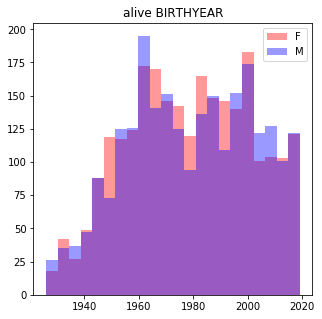

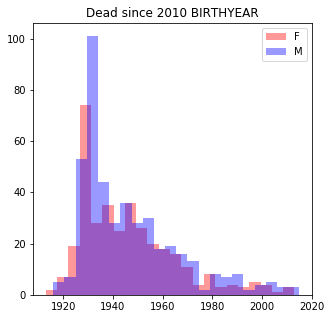

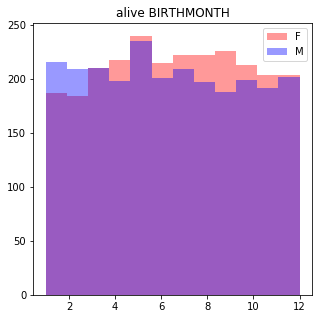

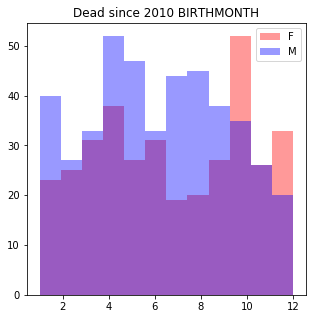

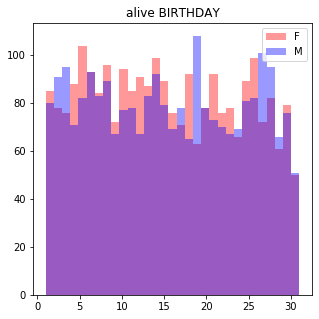

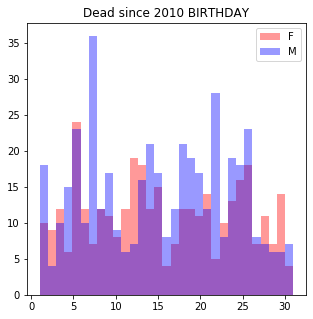

In [704]:
for sub_tup in [('BIRTHYEAR',22),('BIRTHMONTH',12),('BIRTHDAY',31)]:
    for status in [alive, recent_dead]:
        bins = 12
        f=plt.figure(figsize=(5,5))
        plt.hist(status[status['GENDER']=='F'][sub_tup[0]], bins = sub_tup[1], color = 'r', alpha = 0.4, label='F')
        plt.hist(status[status['GENDER']=='M'][sub_tup[0]], bins = sub_tup[1], color = 'b', alpha = 0.4, label='M')
        plt.legend()
        plt.title(status.name + " "+ sub_tup[0])

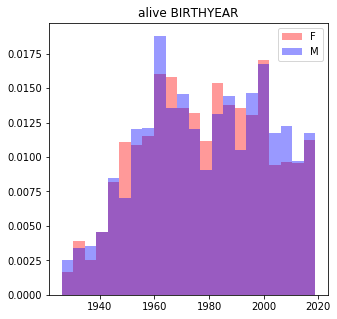

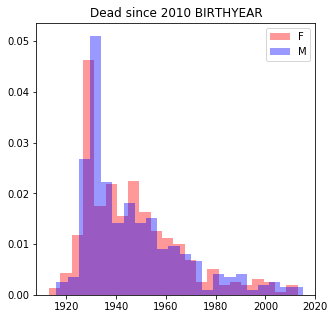

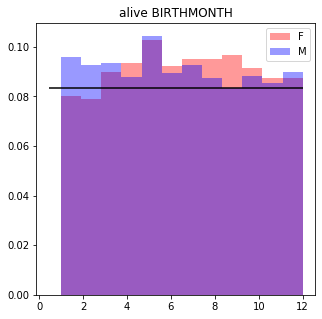

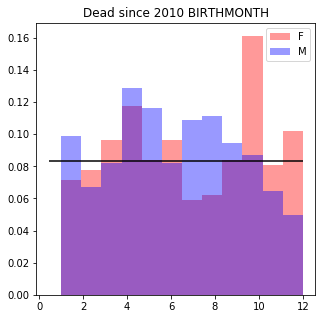

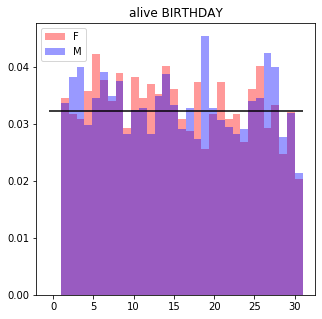

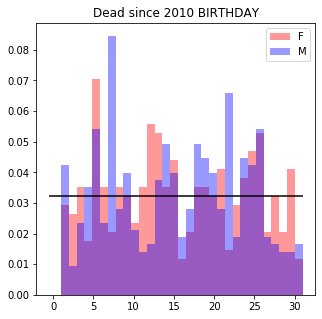

In [705]:
## OK so that's weird. Does it go away if I look at density instead of abs numbers?
for sub_tup in [('BIRTHYEAR',22),('BIRTHMONTH',12),('BIRTHDAY',31)]:
    for status in [alive, recent_dead]:
        f=plt.figure(figsize=(5,5))
        plt.hist(status[status['GENDER']=='F'][sub_tup[0]], bins = sub_tup[1], color = 'r', alpha = 0.4, label='F', density=True)
        plt.hist(status[status['GENDER']=='M'][sub_tup[0]], bins = sub_tup[1], color = 'b', alpha = 0.4, label='M', density= True)
        xmin=plt.gca().get_xlim()[0]
        if sub_tup[0]!='BIRTHYEAR':
            plt.hlines(y=1/(sub_tup[1]), xmin=xmin, xmax = max(pats[sub_tup[0]].values))

        plt.legend()
        plt.title(status.name + " " + sub_tup[0])

In [717]:
recent_dead['BIRTHYEAR'].value_counts()[:10]


1929    66
1931    60
1930    52
1932    37
1935    24
1941    22
1933    21
1947    19
1937    17
1949    16
Name: BIRTHYEAR, dtype: int64

In [710]:
recent_dead_men_ages = recent_dead[recent_dead['BIRTHYEAR']<1933][recent_dead['GENDER']=='M']['DEATHYEAR'].apply(lambda x: x-1930)
recent_dead_men_ages.value_counts()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


81.0    27
84.0    23
83.0    23
88.0    21
85.0    19
82.0    16
86.0    15
87.0     9
89.0     2
Name: DEATHYEAR, dtype: int64

### A BRIEF DETOUR INTO OTHER DEMOGRAPHIC FEATURES

### Race and ethnicity

In [722]:
alive['RACE'].value_counts()/len(alive)

white       0.756049
hispanic    0.107578
black       0.071586
asian       0.060588
native      0.003399
other       0.000800
Name: RACE, dtype: float64

In [723]:
recent_dead['RACE'].value_counts()/len(recent_dead)

white       0.733586
hispanic    0.140152
asian       0.064394
black       0.058081
native      0.003788
Name: RACE, dtype: float64

In [724]:
dead[dead['BIRTHYEAR']<1933]['RACE'].value_counts()/len(dead[dead['BIRTHYEAR']<1933])

white       0.708129
hispanic    0.164757
black       0.070376
asian       0.056738
Name: RACE, dtype: float64

In [725]:
# HISPANIC FOLK DIE MORE? THE DIFF BTW 10% of alive folk vs 15% of dead folk SEEMS ODD TO ME AT A GLANCE.
# IF I HAD MORE TIME I'D CHECK ON THEM MORE CLOSELY.

### MARITAL STATUS

In [730]:
alive['GENDER'].value_counts()/len(alive)

F    0.508898
M    0.491102
Name: GENDER, dtype: float64

In [733]:
alive[alive['BIRTHYEAR']<2001]['MARITAL'].value_counts()/len(alive) #Really should only look at over 18s for this
#Yes, I checked, no child brides :)


M    0.535693
S    0.130774
Name: MARITAL, dtype: float64

In [741]:
alive['ETHNICITY'].value_counts()/len(alive)

irish               0.197560
italian             0.123375
english             0.091182
french              0.067187
puerto_rican        0.060588
german              0.060388
polish              0.043791
portuguese          0.039392
american            0.038992
chinese             0.037393
french_canadian     0.030794
dominican           0.024595
african             0.024395
asian_indian        0.023195
west_indian         0.022595
scottish            0.021996
russian             0.019196
south_american      0.015997
central_american    0.015597
mexican             0.015397
swedish             0.011998
greek               0.010198
american_indian     0.003399
arab                0.000800
Name: ETHNICITY, dtype: float64

### WHERE ARE THE OLD FOLKS DYING?

In [763]:
prop_deaths_early=recent_dead[recent_dead['BIRTHYEAR']<1940]['CITY'].value_counts()/len(recent_dead[recent_dead['BIRTHYEAR']<1940])
prop_deaths_late=recent_dead[recent_dead['BIRTHYEAR']>1940]['CITY'].value_counts()/len(recent_dead[recent_dead['BIRTHYEAR']>1940])


In [765]:
prop_deaths_early[:10]  #Towns with highest proportion of young people deaths (Of all young deaths, what % happened in this town)

Worcester      0.050938
Lynn           0.042895
Lowell         0.040214
Chicopee       0.034853
Agawam Town    0.032172
Natick         0.032172
Everett        0.029491
Medford        0.029491
Boston         0.029491
Marblehead     0.026810
Name: CITY, dtype: float64

In [776]:
prop_deaths_late[:10] #Towns with highest proportion of all old people deaths (Of all aged deaths, what % happened in this town)

Boston         0.089109
Worcester      0.029703
New Bedford    0.019802
Lynn           0.019802
Lawrence       0.017327
Springfield    0.017327
Hingham        0.017327
Canton         0.017327
Lowell         0.017327
Quincy         0.017327
Name: CITY, dtype: float64

In [780]:
early_to_late = prop_deaths_early / prop_deaths_late  
early_to_late[early_to_late.notnull()].sort_values(ascending=False)[:15]
#Towns with a bigger share of young deaths than of old deaths
#Opioids? Or just having a small population and a few young deaths. Running out of time, so have to save it for now.

Marblehead      10.831099
Stoneham         9.747989
Southampton      7.581769
Natick           6.498660
Sudbury          6.498660
Medford          5.957105
Brockton         4.873995
Chicopee         4.693476
Agawam Town      4.332440
Swampscott       4.332440
Raynham          4.332440
Hanover          4.332440
Methuen Town     3.790885
Westford         3.249330
Lexington        3.249330
Name: CITY, dtype: float64

In [778]:
alive['CITY'].value_counts()[:15]

Boston         482
Worcester      141
Springfield    101
Quincy          80
Lowell          75
Brockton        74
Cambridge       69
New Bedford     69
Newton          65
Somerville      65
Lawrence        62
Lynn            61
Chicopee        59
Brookline       46
Attleboro       46
Name: CITY, dtype: int64

In [779]:
pats['CITY'].value_counts()[:15]

Boston         669
Worcester      289
Brockton       170
Lowell         154
Lynn           154
Cambridge      142
Quincy         136
Springfield    135
New Bedford    125
Chicopee       122
Everett        121
Newton         109
Somerville     108
Lawrence       108
Peabody        106
Name: CITY, dtype: int64

### INITIAL THOUGHTS ON PATIENTS

So, there appear to be a lot (A LOT) of men born in the late 30s using health services, and dying, here. A lot of people born in the late 30s, and way more men. 

All the same. There are WAY MORE men than there are women from the 30s using healthcare and dying. Men in their late 60s-70s HATE going to the doctor. Although, it looks like they were mostly married, and those guys wives make them go to the doctor (sexist but true last time I checked - married men die slower than singletons)

MINOR POINTS
Also why would there be more women than men born in the fall, and in the second week of the month in general?
The month and day stuff looks like if I checked closer it'd be maybe within range of normal variation, so I'm going to drop it for now. But those birth years though. What??

I could probably rabbit-hole into patient data for ages, but I'm only supposed to spend an afternoon on this and I've clearly gotten distracted from basic data quality checks. On to the other files!

### MEDICATIONS

In [222]:
meds = pd.read_csv("medications.csv")

In [782]:
meds['START']=meds['START'].apply(pd.to_datetime)
meds['STOP']=meds['STOP'].apply(pd.to_datetime)

In [783]:
meds.isnull().sum()

START                    0
STOP                 16524
PATIENT                  0
ENCOUNTER                0
CODE                     0
DESCRIPTION              0
COST                     0
DISPENSES                0
TOTALCOST                0
REASONCODE           44940
REASONDESCRIPTION    44940
dtype: int64

In [784]:
meds_plus_dem = meds.merge(pats, left_on="PATIENT", right_on="Id")

In [799]:
## Let's just look at recent usage, because I'm running out of time a bit here.
## This cutoff also implies the people were alive at least up to 1990
meds_plus_dem = meds_plus_dem[meds_plus_dem['START'].dt.year > 1990]

In [990]:
enc_providers = enc[['PATIENT','PROVIDER','Id']]

In [992]:
meds_plus_dem_plus_docs = meds_plus_dem.merge(enc_providers, left_on="ENCOUNTER", right_on="Id", how = 'inner')

In [1017]:
meds_plus_dem_plus_docs = meds_plus_dem_plus_docs.merge(orgs, left_on="PROVIDER", right_on="Id", how = 'inner')

In [1018]:
len(meds_plus_dem_plus_docs)

90379

In [787]:
for code in meds_plus_dem['CODE'].value_counts().index[:30]:
    print(meds_plus_dem[meds_plus_dem['CODE']==code]['DESCRIPTION'].value_counts())
    print()

simvistatin 10 mg    14029
Name: DESCRIPTION, dtype: int64

1 ml epoetin alfa 4000 unt/ml injection [epogen]    12193
Name: DESCRIPTION, dtype: int64

acetaminophen 325 mg oral tablet    7013
Name: DESCRIPTION, dtype: int64

cisplatin 50 mg injection    4752
Name: DESCRIPTION, dtype: int64

paclitaxel 100 mg injection    4064
Name: DESCRIPTION, dtype: int64

amoxicillin 250 mg / clavulanate 125 mg oral tablet    3019
Name: DESCRIPTION, dtype: int64

acetaminophen 325 mg / oxycodone hydrochloride 5 mg oral tablet    2750
Name: DESCRIPTION, dtype: int64

abuse-deterrent 12 hr oxycodone hydrochloride 15 mg extended release oral tablet    2575
Name: DESCRIPTION, dtype: int64

acetaminophen 300 mg / hydrocodone bitartrate 5 mg [vicodin]    2564
Name: DESCRIPTION, dtype: int64

naproxen sodium 220 mg oral tablet    2300
Name: DESCRIPTION, dtype: int64

ibuprofen 200 mg oral tablet    2048
Name: DESCRIPTION, dtype: int64

acetaminophen 21.7 mg/ml / dextromethorphan hydrobromide 1 mg/ml / doxy

In [282]:
#Because opioids

In [1037]:
meds_plus_dem['DESCRIPTION']=meds_plus_dem['DESCRIPTION'].str.lower()
meds_plus_dem['REASONDESCRIPTION']=meds_plus_dem['REASONDESCRIPTION'].str.lower()
meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("codone")]['PATIENT'].nunique()
#How many scripts for 'codones' do we see?

3655

In [293]:
#HALF THE PEOPLE HAVE HAD OPIOIDS?!?

In [1019]:
len(meds_plus_dem_plus_docs[meds_plus_dem_plus_docs['DESCRIPTION'].str.contains("codone")])
#How many total scripts for 'codones'?

8111

In [1029]:
#Who is prescribing the codones?
meds_plus_dem_plus_docs[meds_plus_dem_plus_docs['DESCRIPTION'].str.contains("codone")]['NAME'].value_counts()[:5]

HALLMARK HEALTH SYSTEM           418
NORTH SHORE MEDICAL CENTER -     348
LOWELL GENERAL HOSPITAL          286
BEVERLY HOSPITAL CORPORATION     253
GOOD SAMARITAN MEDICAL CENTER    250
Name: NAME, dtype: int64

In [789]:
#WHAT ABOUT JUST ALIVE PEOPLE?
meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("codone")][meds_plus_dem['DEATHDATE'].isnull()]['Id'].nunique()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


2268

In [790]:
2268/5000 #That's almost half of alive people with opioid scripts?!

0.4536

In [791]:
meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("codone")][meds_plus_dem['DEATHDATE'].isnull()]['BIRTHYEAR'].value_counts()[:10]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1986    182
1987    165
1989    151
1983    138
1984    135
1988    128
1994    123
1985    120
1996    116
1991    111
Name: BIRTHYEAR, dtype: int64

In [794]:
# Opioid prescriptions for the 'young'
meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("codone")][meds_plus_dem['DEATHDATE'].isnull()][meds_plus_dem['BIRTHYEAR']>1980]['Id'].value_counts()[:10]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0b24afa8-2453-4d75-9b0f-34a150d510b5    15
bc96bbc2-d741-4ac5-a3f4-8dadb0dddc33    13
db153b45-5f34-4b37-b8a1-8d1779be8a21    13
448bbf28-b47d-4325-b45d-0dc6bc8f4f31    12
98e2e93a-8ef4-4b97-a4d8-fba2bf62ea75    11
fc74bf14-fc1c-4f4c-a2d2-190bafb84b00    10
4c12edfc-7da7-4103-8b4a-e7a958f92120    10
930582b8-d01b-4fc7-a731-ecd011eff16b    10
2b433be1-ae2c-4be7-9502-cc878db84e4d     9
98b4bce5-803d-4297-ae55-69c5dfe7fe42     9
Name: Id, dtype: int64

In [802]:

#opioid scripts among the recently dead young people
meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("codone")][meds_plus_dem['DEATHYEAR']>1990][meds_plus_dem['BIRTHYEAR']>1980]['Id'].nunique()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


52

In [803]:
#Total recently dead young people
pats[pats['DEATHYEAR']>1990][pats['BIRTHYEAR']>1980]['Id'].nunique()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


146

In [805]:
52/146  #That's a lot of dead young people with opioid prescriptions? OR is it?

0.3561643835616438

In [806]:
#Any useful data in the reason description? Not really
meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("codone")][meds_plus_dem['DEATHDATE'].isnull()]['REASONDESCRIPTION'].value_counts()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Posttraumatic stress disorder    4
Primary fibromyalgia syndrome    4
Name: REASONDESCRIPTION, dtype: int64

In [1039]:
#meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("codone")][meds_plus_dem['DEATHDATE'].isnull()][meds_plus_dem['BIRTHYEAR']>1980]['Id'].value_counts()[:10]

### Checking for other insanity in meds

(array([9.0282e+04, 5.5000e+01, 1.8000e+01, 1.3000e+01, 6.0000e+00,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.90000000e-01, 1.91952726e+05, 3.83905162e+05, 5.75857598e+05,
        7.67810034e+05, 9.59762470e+05, 1.15171491e+06, 1.34366734e+06,
        1.53561978e+06, 1.72757221e+06, 1.91952465e+06]),
 <a list of 10 Patch objects>)

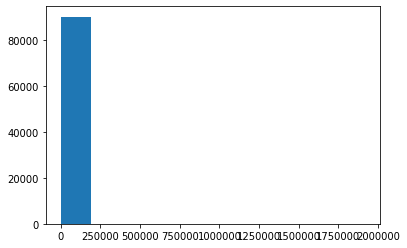

In [795]:
plt.hist(meds_plus_dem['TOTALCOST'])

In [808]:
meds_plus_dem['REASONDESCRIPTION'].value_counts()[:15]

Hyperlipidemia                                                           14029
Anemia (disorder)                                                        12193
Non-small cell carcinoma of lung  TNM stage 1 (disorder)                  8128
Acute bronchitis (disorder)                                               6149
Viral sinusitis (disorder)                                                2709
Streptococcal sore throat (disorder)                                      1644
Primary small cell malignant neoplasm of lung  TNM stage 1 (disorder)     1376
Chronic congestive heart failure (disorder)                               1123
Hypertension                                                               829
Escherichia coli urinary tract infection                                   747
Diabetes                                                                   617
Cystitis                                                                   512
Alzheimer's disease (disorder)                      

In [809]:
#Cancer. Lung cancer is generally 20-30 / 100k people per year. So I'd expect 1-3 in my 8000 person sample per year. That's 

In [824]:
meds_plus_dem[meds_plus_dem['REASONDESCRIPTION'].str.contains("lung")==True]['Id'].nunique()

118

In [828]:
meds_plus_dem[meds_plus_dem['REASONDESCRIPTION'].str.contains("lung")==True]['BIRTHYEAR'].value_counts()

1929    1410
1932     802
1930     786
1931     478
1928     428
1947     342
1936     338
1939     296
1950     240
1914     236
1918     216
1963     212
1922     212
1965     212
1940     206
1916     198
1935     190
1952     170
1937     164
1919     156
1943     144
1941     142
1967     140
1917     134
1934     118
1951     118
1921     118
1942      96
1961      96
1945      94
1955      94
1962      94
1927      94
1924      92
1933      92
1953      90
1920      80
1966      72
1948      70
1912      62
1938      48
1915      48
1970      26
1946      16
1923      12
1926      12
1925      10
Name: BIRTHYEAR, dtype: int64

In [1033]:
# 69 old folks with lung problems? But they have repeated problems
meds_plus_dem[meds_plus_dem['REASONDESCRIPTION'].str.contains("lung")==True][meds_plus_dem['BIRTHYEAR']<1935]['PATIENT'].nunique()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


69

In [890]:
#Only 100 people getting insulin?
meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("insulin")][meds_plus_dem['DEATHDATE'].isnull()]['Id'].nunique()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


100

In [1040]:
#meds_plus_dem[meds_plus_dem['DESCRIPTION'].str.contains("insulin")]

In [ ]:
#ONLY 100 people are getting insulin? That can't be right? There's 190 diabetics! (see below)

### OBSERVATIONS

In [829]:
obs = pd.read_csv("observations.csv")

In [830]:
obs.columns

Index(['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'VALUE', 'UNITS',
       'TYPE'],
      dtype='object')

In [836]:
obs['DATE'] = obs['DATE'].apply(pd.to_datetime)

In [837]:
## LOOKING JUST AT RECENTER STUFF
obs = obs[obs['DATE'].dt.year >= 1990]

In [839]:
obs['DESCRIPTION'].value_counts()[:20]

Pain severity - 0-10 verbal numeric rating [Score] - Reported    174135
Diastolic Blood Pressure                                         133346
Systolic Blood Pressure                                          133346
Body Weight                                                      132003
Tobacco smoking status NHIS                                      132003
Body Height                                                      132003
Body Mass Index                                                  120924
Glucose                                                           74491
Urea Nitrogen                                                     74491
Carbon Dioxide                                                    74491
Potassium                                                         74491
Chloride                                                          74491
Creatinine                                                        74491
Calcium                                                         

In [840]:
causes_of_death = obs[obs['DESCRIPTION'].apply(lambda x: 'Death' in x) == True]

In [841]:
len(causes_of_death)

2127

In [868]:
dead['AGE_BIN_AT_DEATH'].unique()

[adults, middle_age, senior, kids, teens, elder, NaN]
Categories (6, object): [kids < teens < adults < middle_age < senior < elder]

In [871]:
#Let's bin folks by age so I can get a grip on causes of death

recent_dead_folk = recent_dead['Id'].values
recent_dead_seniors = recent_dead[recent_dead['AGE_BIN_AT_DEATH']=='senior']['Id'].values
recent_dead_young = recent_dead[recent_dead['AGE_BIN_AT_DEATH']=='adults']['Id'].values
recent_dead_middle_age = recent_dead[recent_dead['AGE_BIN_AT_DEATH']=='middle_age']['Id'].values
recent_causes = causes_of_death[causes_of_death['PATIENT'].isin(recent_dead_folk)]
recent_senior_causes = causes_of_death[causes_of_death['PATIENT'].isin(recent_dead_seniors)]
recent_ya_causes = causes_of_death[causes_of_death['PATIENT'].isin(recent_dead_young)]
recent_ma_causes = causes_of_death[causes_of_death['PATIENT'].isin(recent_dead_middle_age)]

In [872]:
recent_ma_causes['VALUE'].value_counts()[:10]/len(recent_ma_causes)

Natural death with unknown cause                          0.379310
Drug overdose                                             0.281609
Myocardial Infarction                                     0.086207
Malignant tumor of colon                                  0.045977
Pneumonia                                                 0.040230
Non-small cell lung cancer (disorder)                     0.034483
Familial Alzheimer's disease of early onset (disorder)    0.022989
Pulmonary emphysema (disorder)                            0.022989
Sudden Cardiac Death                                      0.017241
Overlapping malignant neoplasm of colon                   0.011494
Name: VALUE, dtype: float64

In [870]:
recent_ya_causes['VALUE'].value_counts()[:10]/len(recent_ya_causes)

Drug overdose                                               0.490196
Natural death with unknown cause                            0.274510
Myocardial Infarction                                       0.078431
Bullet wound                                                0.039216
Sudden Cardiac Death                                        0.039216
Malignant tumor of colon                                    0.019608
Cardiac Arrest                                              0.019608
Pulmonary emphysema (disorder)                              0.019608
Fracture of the vertebral column with spinal cord injury    0.019608
Name: VALUE, dtype: float64

In [860]:
recent_causes['VALUE'].value_counts()[:10]/len(recent_causes)

Natural death with unknown cause         0.553802
Drug overdose                            0.143472
Myocardial Infarction                    0.055954
Pneumonia                                0.048780
Sudden Cardiac Death                     0.035868
Alzheimer's disease (disorder)           0.030129
Stroke                                   0.028694
Non-small cell lung cancer (disorder)    0.025825
Pulmonary emphysema (disorder)           0.014347
Malignant tumor of colon                 0.014347
Name: VALUE, dtype: float64

In [861]:
recent_senior_causes['VALUE'].value_counts()[:10]/len(recent_senior_causes)

Natural death with unknown cause           0.672209
Pneumonia                                  0.059382
Drug overdose                              0.054632
Alzheimer's disease (disorder)             0.049881
Myocardial Infarction                      0.045131
Stroke                                     0.040380
Non-small cell lung cancer (disorder)      0.028504
Pulmonary emphysema (disorder)             0.011876
Cardiac Arrest                             0.009501
Small cell carcinoma of lung (disorder)    0.007126
Name: VALUE, dtype: float64

In [873]:
#causes_of_death['VALUE'].value_counts()[:15]/len(causes_of_death)

Natural death with unknown cause                          0.512929
Drug overdose                                             0.139633
Myocardial Infarction                                     0.060179
Sudden Cardiac Death                                      0.043724
Non-small cell lung cancer (disorder)                     0.038082
Stroke                                                    0.035731
Pneumonia                                                 0.032910
Neoplasm of prostate                                      0.024918
Alzheimer's disease (disorder)                            0.024448
Pulmonary emphysema (disorder)                            0.015985
Cardiac Arrest                                            0.015985
Malignant tumor of colon                                  0.011754
Chronic obstructive bronchitis (disorder)                 0.009873
Familial Alzheimer's disease of early onset (disorder)    0.007992
Small cell carcinoma of lung (disorder)                   0.00

In [874]:
bmis = obs[obs['DESCRIPTION']=='Body Mass Index'].sort_values("DATE").groupby("PATIENT").last()

#KEEPS THE MOST RECENT BMI OBSERVATION FOR EACH PATIENT

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


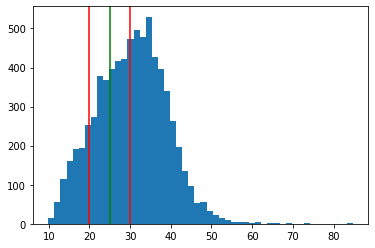

In [875]:
#print(bmis.head())

plt.hist(bmis['VALUE'].apply(float), bins=50)
plt.axvline(x=25, color='g')
plt.axvline(x=20, color = 'r')
plt.axvline(x=30, color = 'r')

In [889]:
#obese = bmis[bmis['VALUE'].apply(float)>35]['PATIENT'].values
bmis.reset_index()
obese = bmis[bmis['VALUE'].apply(float)>35].reset_index()
alive_ids = alive['Id'].values
alive_obese = obese[obese['PATIENT'].isin(alive_ids)]
len(alive_obese)/len(alive)

#30% obesity rate....that's no bueno

0.29154169166166766

### ALLERGIES

In [359]:
allergy = pd.read_csv("allergies.csv")

In [414]:
allergy.columns

Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')

In [415]:
allergy['DESCRIPTION'].value_counts()

Allergy to mould            470
Dander (animal) allergy     434
House dust mite allergy     344
Allergy to tree pollen      326
Allergy to grass pollen     318
Shellfish allergy           269
Allergy to peanuts          177
Allergy to bee venom        143
Allergy to fish             138
Allergy to eggs             131
Latex allergy               131
Allergy to nut              127
Allergy to wheat            127
Allergy to dairy product     79
Allergy to soya              48
Name: DESCRIPTION, dtype: int64

In [ ]:
# This seems...fine

### ENCOUNTERS

In [355]:
enc = pd.read_csv("encounters.csv")

In [408]:
enc.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'PROVIDER', 'ENCOUNTERCLASS', 'CODE',
       'DESCRIPTION', 'COST', 'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')

In [959]:
enc = enc[enc['START'].apply(lambda x: int(x[:4]))>1990]

In [960]:
enc['DESCRIPTION'].value_counts()[:20]

Encounter for problem (procedure)         214828
Encounter for check up (procedure)        131636
Outpatient procedure (procedure)           46976
Encounter for symptom                      36039
Prenatal visit                             26880
Emergency Room Admission                   22858
Outpatient procedure                       17710
Encounter for problem                      17314
Drug rehabilitation and detoxification     17254
Patient encounter procedure                16386
Follow-up encounter                        14041
Consultation for treatment                 12278
Encounter for 'check-up'                   11108
Encounter Inpatient                        10521
Emergency room admission (procedure)        8590
Emergency Encounter                         6841
Prenatal initial visit                      5314
Postnatal visit                             3117
Obstetric emergency hospital admission      3115
Asthma follow-up                            2408
Name: DESCRIPTION, d

In [962]:
enc['REASONDESCRIPTION'].value_counts()[:20]

Normal pregnancy                                                         35374
Drug overdose                                                            22195
Hyperlipidemia                                                           14029
Viral sinusitis (disorder)                                               13521
Acute viral pharyngitis (disorder)                                        7538
Child attention deficit disorder                                          6367
Acute bronchitis (disorder)                                               6364
Chronic pain                                                              3486
Chronic intractable migraine without aura                                 3446
Impacted molars                                                           3432
Chronic congestive heart failure (disorder)                               2412
Asthma                                                                    2005
Otitis media                                        

In [976]:
enc['REASONDESCRIPTION']=enc['REASONDESCRIPTION'].str.lower()
enc[enc['REASONDESCRIPTION'].apply(lambda x: 'diabetes' in str(x))]

,Id,START,STOP,PATIENT,PROVIDER,ENCOUNTERCLASS,CODE,DESCRIPTION,COST,REASONCODE,REASONDESCRIPTION
384732,e0c46e39-630c-40ac-9274-58106f2bdafd,2004-10-23T09:17:09Z,2004-11-20T10:17:09Z,c4ae5f6e-6136-48e4-b1e1-311f586d6563,f4e7709c-02f6-37ca-aeea-8247d74e88e7,inpatient,185347001,Encounter for problem,129.16,3.685810e+14,neuropathy due to type 2 diabetes mellitus (di...
543579,02a8ec02-0bcf-42d6-9946-e8b845e06b52,1997-04-03T11:27:35Z,1997-05-08T12:27:35Z,d135c94d-692d-4edd-b8cb-35c89cc4d54d,a9f20dc1-5147-3789-bcef-bbecb41c5983,inpatient,185347001,Encounter for problem,129.16,3.685810e+14,neuropathy due to type 2 diabetes mellitus (di...


In [ ]:
## WHERE ARE THE DIABETES ENCOUNTERS. I probably need to dig into the codes and I don't have time.

### CONDITIONS

In [358]:
cond = pd.read_csv("conditions.csv")

In [942]:
cond.columns

Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'Id',
       'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'BIRTHYEAR',
       'BIRTHDAY', 'BIRTHMONTH'],
      dtype='object')

In [476]:
cond = pd.merge(cond, pats, left_on="PATIENT", right_on="Id")

In [892]:
cond['START']=cond['START'].apply(pd.to_datetime)

In [893]:
## Keeping just the recent things
cond = cond[cond['START'].dt.year > 1990]

In [902]:
cond['DESCRIPTION'].value_counts()[:25]

viral sinusitis (disorder)                   13481
acute viral pharyngitis (disorder)            7536
acute bronchitis (disorder)                   6142
normal pregnancy                              5047
drug overdose                                 4517
chronic pain                                  2466
chronic intractable migraine without aura     2420
impacted molars                               2412
otitis media                                  1847
streptococcal sore throat (disorder)          1781
body mass index 30+ - obesity (finding)       1551
anemia (disorder)                             1348
sprain of ankle                               1324
prediabetes                                   1092
polyp of colon                                 871
chronic sinusitis (disorder)                   766
concussion with no loss of consciousness       765
acute bacterial sinusitis (disorder)           743
sinusitis (disorder)                           732
hyperlipidemia                 

In [900]:
cond['DESCRIPTION']=cond['DESCRIPTION'].str.lower()
cond[cond['DESCRIPTION'].str.contains("diabetes")]['DESCRIPTION'].value_counts()

prediabetes                                                                         1092
diabetes                                                                             224
neuropathy due to type 2 diabetes mellitus (disorder)                                120
diabetic retinopathy associated with type ii diabetes mellitus (disorder)             96
nonproliferative diabetic retinopathy due to type 2 diabetes mellitus (disorder)      60
macular edema and retinopathy due to type 2 diabetes mellitus (disorder)              34
proliferative diabetic retinopathy due to type ii diabetes mellitus (disorder)        24
microalbuminuria due to type 2 diabetes mellitus (disorder)                           21
proteinuria due to type 2 diabetes mellitus (disorder)                                 5
blindness due to type 2 diabetes mellitus (disorder)                                   2
Name: DESCRIPTION, dtype: int64

In [925]:
##How many people have been diagnosed with diabetes?
diabetics = cond[cond['DESCRIPTION']=='diabetes']['PATIENT'].unique()


In [929]:
## Have any of those fixed themselves with diet and exercise?
sum(cond[cond['DESCRIPTION']=='diabetes']['STOP'].notnull())
## NOPE.

0

In [930]:
## So how many alive diabetics do we have?
len(set(alive_ids).intersection(set(diabetics)))

## THAT CAN"T BE RIGHT - we only saw 100 alive folk getting insulin ever.
## THAT'S LIKE HALF THE DIABETICS NOT GETTING INSULIN?

190

In [977]:
190/5000
#So 4% diabetes prevalence, but 30% obesity?
# That has to be underdiagnosed. It's definitely being underserved in terms of insulin scripts.

0.038

In [931]:
overdoses = cond[cond['DESCRIPTION'].str.contains("overdose")]['PATIENT'].unique()

#THAT CAN'T BE RIGHT...
len(set(alive_ids).intersection(set(overdoses)))

3017

In [932]:
3017/5000

0.6034

In [933]:
# 60% of alive patients have a drug overdose on their records?! Can that even be possible?

In [934]:
cond[cond['DESCRIPTION'].str.contains("overdose")]['DESCRIPTION'].value_counts()

drug overdose    4517
Name: DESCRIPTION, dtype: int64

In [939]:
cond['PATIENT'].nunique() < alive['Id'].nunique()
len(set(alive['Id'].values).intersection(set(cond['PATIENT'].values)))
#That's fine. Some patients don't have any conditions, maybe

4904

In [940]:
len(cond[cond['DESCRIPTION'].str.contains("overdose")][cond['DEATHDATE'].isnull()==False])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1501

In [485]:
#THAT SEEMS LIKE A LOT OF OVERDOSES TO ME?

In [944]:
len(cond[cond['DESCRIPTION'].str.contains("overdose")][pd.to_datetime(cond['DEATHDATE']).dt.year>2010])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


645

In [950]:
len(set(recent_dead['Id'].values).intersection(set(overdoses)))/len(set(recent_dead['Id'].values))

0.8131313131313131

In [951]:
## A FULL 80% OF RECENT DEAD FOLK HAVE AN OVERDOSE ON THEIR RECORDS??!?!

In [ ]:
## OK. I Want to know who the dirty docs are.

### PROVIDERS

In [467]:
prov = pd.read_csv("providers.csv")

In [404]:
prov.columns

Index(['Id', 'ORGANIZATION', 'NAME', 'GENDER', 'SPECIALITY', 'ADDRESS', 'CITY',
       'STATE', 'ZIP', 'UTILIZATION'],
      dtype='object')

In [405]:
prov.head()

,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,UTILIZATION
0,af944a62-54d2-4af0-b441-255e7f399cd2,ef58ea08-d883-3957-8300-150554edc8fb,Noe500 Dibbert990,M,GENERAL PRACTICE,60 HOSPITAL ROAD,LEOMINSTER,MA,1453,33568
1,66105bcb-96ef-4289-b1fb-996c631e5ea2,69176529-fd1f-3b3f-abce-a0a3626769eb,Mariam937 Gleason633,F,GENERAL PRACTICE,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,2138,57842
2,e164c630-bacb-47e3-81d3-6821b8f5d112,5e765f2b-e908-3888-9fc7-df2cb87beb58,Dagny669 Schoen8,F,GENERAL PRACTICE,211 PARK STREET,ATTLEBORO,MA,2703,72109
3,9cdc032d-fcad-4aef-a5ef-b42626e9c34e,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,Tyron580 Torphy630,M,GENERAL PRACTICE,ONE GENERAL STREET,LAWRENCE,MA,1842,66339
4,3880a375-efa5-456b-bcdf-b5aee0280512,e002090d-4e92-300e-b41e-7d1f21dee4c6,Loren192 Fay398,M,GENERAL PRACTICE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,2138,57789


In [1005]:
opioid_docs

array(['24cb4eab-6166-3530-bddc-a5a8a14a4fc1',
       'b1ddf812-1fdd-3adf-b1d5-32cc8bd07ebb',
       '08bcda9c-f8c8-3244-82d4-fc306a7a55d3', ...,
       'ebc3f5c4-6700-34af-8323-85621c313726',
       'cb6a50e0-af76-3758-99ad-3200ede03fff',
       'cb6a50e0-af76-3758-99ad-3200ede03fff'], dtype=object)

In [1013]:
len(set(prov['ORGANIZATION'].values).intersection(set(opioid_docs)))

83

### PROCEDURES

In [360]:
proc = pd.read_csv("procedures.csv")

In [402]:
proc.columns

Index(['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'COST',
       'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')

In [418]:
proc['DESCRIPTION'].value_counts()

Documentation of current medications                               73957
Auscultation of the fetal heart                                    33693
Evaluation of uterine fundal height                                33693
Renal dialysis (procedure)                                         23892
Subcutaneous immunotherapy                                         19430
Intramuscular injection                                            13385
Electrical cardioversion                                           10214
Colonoscopy                                                         9444
Hemoglobin / Hematocrit / Platelet count                            7565
Combined chemotherapy and radiation therapy (procedure)             7536
Cognitive and behavioral therapy                                    7238
Depression screening                                                5938
Standard pregnancy test                                             5914
Ultrasound scan for fetal viability                

In [403]:
proc['REASONDESCRIPTION'].value_counts()

Normal pregnancy                                                         182604
Atrial Fibrillation                                                       12596
Child attention deficit disorder                                           7238
Acute bronchitis (disorder)                                                5760
Non-small cell carcinoma of lung  TNM stage 1 (disorder)                   5565
Pulmonary emphysema (disorder)                                             3273
Acute viral pharyngitis (disorder)                                         2983
Chronic obstructive bronchitis (disorder)                                  2821
Polyp of colon                                                             2292
Primary small cell malignant neoplasm of lung  TNM stage 1 (disorder)      1246
Streptococcal sore throat (disorder)                                       1165
Fracture of forearm                                                         829
Fracture of clavicle                    

### PLANS AND ORGS

In [363]:
plans = pd.read_csv("careplans.csv")
orgs = pd.read_csv("organizations.csv")

In [400]:
orgs.columns

Index(['Id', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'PHONE',
       'UTILIZATION'],
      dtype='object')

In [401]:
orgs.head()

,Id,NAME,ADDRESS,CITY,STATE,ZIP,PHONE,UTILIZATION
0,ef58ea08-d883-3957-8300-150554edc8fb,HEALTHALLIANCE HOSPITALS INC,60 HOSPITAL ROAD,LEOMINSTER,MA,1453,9784662000,33568
1,69176529-fd1f-3b3f-abce-a0a3626769eb,MOUNT AUBURN HOSPITAL,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,2138,6174923500,57842
2,5e765f2b-e908-3888-9fc7-df2cb87beb58,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,2703,5082225200,72109
3,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,LAWRENCE GENERAL HOSPITAL,ONE GENERAL STREET,LAWRENCE,MA,1842,9786834000,66339
4,e002090d-4e92-300e-b41e-7d1f21dee4c6,CAMBRIDGE HEALTH ALLIANCE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,2138,6176652300,57789


In [1015]:
orgs[orgs['Id'].isin(opioid_docs)]

,Id,NAME,ADDRESS,CITY,STATE,ZIP,PHONE,UTILIZATION
0,ef58ea08-d883-3957-8300-150554edc8fb,HEALTHALLIANCE HOSPITALS INC,60 HOSPITAL ROAD,LEOMINSTER,MA,1453,9784662000,33568
1,69176529-fd1f-3b3f-abce-a0a3626769eb,MOUNT AUBURN HOSPITAL,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,2138,6174923500,57842
2,5e765f2b-e908-3888-9fc7-df2cb87beb58,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,2703,5082225200,72109
3,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,LAWRENCE GENERAL HOSPITAL,ONE GENERAL STREET,LAWRENCE,MA,1842,9786834000,66339
4,e002090d-4e92-300e-b41e-7d1f21dee4c6,CAMBRIDGE HEALTH ALLIANCE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,2138,6176652300,57789
5,ef6ab57c-ed94-3dbe-9861-812d515918b3,CAPE COD HOSPITAL,88 LEWIS BAY ROAD,HYANNIS,MA,2601,5087711800,20948
6,49318f80-bd8b-3fc7-a096-ac43088b0c12,COOLEY DICKINSON HOSPITAL INC THE,30 LOCUST STREET,NORTHAMPTON,MA,1060,4135822000,22084
7,fbf6180e-b800-3ebe-b91d-93d0288c400e,BAYSTATE FRANKLIN MEDICAL CENTER,164 HIGH STREET,GREENFIELD,MA,1301,4137730211,18744
8,8b58cdd1-3d79-3126-8fe0-da2c54d6805c,CARNEY HOSPITAL,2100 DORCHESTER AVENUE,BOSTON,MA,2124,6175062000,19366
9,4bdaa4c2-c664-3089-aee2-7137abbad27f,HARRINGTON MEMORIAL HOSPITAL-1,100 SOUTH STREET,SOUTHBRIDGE,MA,1550,5087659771,31800


In [398]:
plans.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')

In [399]:
plans['DESCRIPTION'].value_counts()

Respiratory therapy                                               8245
Care plan (record artifact)                                       4429
Routine antenatal care                                            4239
Diabetes self management plan                                     3178
Physical therapy procedure                                        2936
Fracture care                                                     2500
Wound care                                                        2410
Musculoskeletal care                                              1896
Head injury rehabilitation                                        1238
Hyperlipidemia clinical management plan                           1219
Self care                                                         1201
Urinary tract infection care                                       737
Overactivity/inattention behavior management                       689
Burn care                                                          617
Cancer

### IMMUNIZATIONS

In [394]:
imm = pd.read_csv("immunizations.csv")

In [395]:
imm.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,COST
0,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8,Hep B adolescent or pediatric,140.52
1,2013-03-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,158ced22-0023-4934-b046-451696f2d516,8,Hep B adolescent or pediatric,140.52
2,2013-05-19,c0d528b6-cdae-4d98-8936-a270f8827eb7,3980f194-389d-42f5-b477-f7c99598d6be,49,Hib (PRP-OMP),140.52
3,2013-05-19,c0d528b6-cdae-4d98-8936-a270f8827eb7,3980f194-389d-42f5-b477-f7c99598d6be,119,rotavirus monovalent,140.52
4,2013-05-19,c0d528b6-cdae-4d98-8936-a270f8827eb7,3980f194-389d-42f5-b477-f7c99598d6be,10,IPV,140.52


In [396]:
imm['DESCRIPTION'].value_counts()

Influenza  seasonal  injectable  preservative free    121749
Td (adult) preservative free                           10304
DTaP                                                    6136
IPV                                                     5590
Hib (PRP-OMP)                                           3901
Hep B  adolescent or pediatric                          3841
meningococcal MCV4P                                     3492
Pneumococcal conjugate PCV 13                           3277
Hep A  adult                                            3231
HPV  quadrivalent                                       3072
MMR                                                     2732
varicella                                               2630
zoster                                                  2472
Hep A  ped/adol  2 dose                                 2458
Hep B  adult                                            2056
pneumococcal polysaccharide vaccine  23 valent          1911
rotavirus  monovalent   

### IMAGING STUDIES

In [385]:
imaging = pd.read_csv("imaging_studies.csv")


In [392]:
imaging.columns

Index(['Id', 'DATE', 'PATIENT', 'ENCOUNTER', 'BODYSITE_CODE',
       'BODYSITE_DESCRIPTION', 'MODALITY_CODE', 'MODALITY_DESCRIPTION',
       'SOP_CODE', 'SOP_DESCRIPTION'],
      dtype='object')

In [388]:
imaging['BODYSITE_DESCRIPTION']=imaging['BODYSITE_DESCRIPTION'].apply(lambda x: x.lower())
imaging['BODYSITE_DESCRIPTION'].value_counts()

thoracic structure (body structure)             3195
thoracic                                        1366
arm                                              666
clavicle                                         622
wrist                                            527
thoracic structure                               525
ankle                                            515
knee                                             338
chest                                            263
pelvis                                           214
structure of right upper quadrant of abdomen      47
Name: BODYSITE_DESCRIPTION, dtype: int64

In [389]:
thoracic = imaging[imaging['BODYSITE_DESCRIPTION'].str.contains('thoracic')]

In [393]:
thoracic

,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
5,99909564-2f6d-4334-b97b-a047a9db726a,2004-10-26,a66bda4b-652d-4b76-b6fd-8aea3b26ad8a,1e60606d-d793-4c07-b8eb-df1e172c4322,261179002,thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
6,d7c3b4a4-f529-4366-bb6e-cbe1d99aeffb,2006-04-19,a66bda4b-652d-4b76-b6fd-8aea3b26ad8a,8fd84b96-f4b2-4e1e-a7a9-1fec8781c698,261179002,thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
7,432ad88d-acec-4adf-86ff-4f0da22d84d7,2006-10-16,a66bda4b-652d-4b76-b6fd-8aea3b26ad8a,ab9bb7f9-64b1-49f3-98ad-78b33bf7bd80,51185008,thoracic structure (body structure),CR,Computed Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
8,5de9f73e-bec2-481f-b44a-80103be687c2,2006-10-16,a66bda4b-652d-4b76-b6fd-8aea3b26ad8a,04a8c66f-2831-47a5-a86c-2292d485dbfe,261179002,thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
9,519ea88a-c304-415f-a96c-7eda22b75afd,2006-10-16,a66bda4b-652d-4b76-b6fd-8aea3b26ad8a,04a8c66f-2831-47a5-a86c-2292d485dbfe,51185008,thoracic structure,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
15,b8728ae4-ebce-48ac-b364-16950bc69fe5,2015-09-12,19f152b5-004e-4002-9875-db61b9ce4118,4f13deaa-2b13-4b7f-ae6c-a9ee1dc43bb1,261179002,thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
16,2beec696-3954-43a5-a6bc-b6887fc29d36,2016-03-10,19f152b5-004e-4002-9875-db61b9ce4118,572f9226-7827-4fbb-9fb8-99e315332613,51185008,thoracic structure (body structure),CR,Computed Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
17,6cf8f158-e843-4022-87c4-93cbe9f4805b,2016-03-10,19f152b5-004e-4002-9875-db61b9ce4118,2df0329f-e657-42ab-9646-6f493ed54d0b,261179002,thoracic,US,Ultrasound,1.2.840.10008.5.1.4.1.1.3.1,Ultrasound Multiframe Image Storage
18,78ecad24-8218-4234-ba83-b8d840846c01,2016-03-10,19f152b5-004e-4002-9875-db61b9ce4118,2df0329f-e657-42ab-9646-6f493ed54d0b,51185008,thoracic structure,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage – for Presentation
29,ef149e56-fffa-4f10-ba22-e37eabbb8bcf,2005-01-31,aee50cc5-d8d5-4fd9-90d7-ac43931c8e60,1cab502f-b8d7-42e1-9423-3b18df6189d9,51185008,thoracic structure (body structure),CT,Computed Tomography,1.2.840.10008.5.1.4.1.1.2,CT Image Storage


### MEDICAL CONCEPTS

In [375]:
#File is missing a header, so I added column names along the same lines as other files
concepts = pd.read_csv("concepts.csv", header=None, names = ['code_type','code','description','reason_description'])

In [376]:
concepts

,code_type,code,description,reason_description
0,LOINC,10230-1,Left ventricular Ejection fraction,Congestive Heart Failure
1,LOINC,14959-1,Microalbumin Creatinine Ratio,Wellness Encounters
2,LOINC,19926-5,FEV1/FVC,COPD
3,LOINC,24321-2,Basic Metabolic 2000 Panel,Metabolic Syndrome Standards of Care
4,LOINC,24323-8,Comprehensive metabolic 2000 panel - Serum or ...,Veteran Prostate Cancer|Congestive Heart Failu...
5,LOINC,24357-6,Urinalysis macro (dipstick) panel - Urine,Veteran Prostate Cancer|Lung Cancer|Dialysis|M...
6,LOINC,24360-0,Hemoglobin and Hematocrit panel - Blood,anemia_sub
7,LOINC,28245-9,Abuse Status [OMAHA],Homelessness
8,LOINC,2857-1,Prostate specific Ag [Mass/volume] in Serum or...,Veteran Prostate Cancer
9,LOINC,29463-7,Body Weight,Wellness Encounters
